## Standard Imports and Upgrades

In [3]:
pip install --upgrade pip

    100% |████████████████████████████████| 2.0MB 2.0MB/s ta 0:00:011
  Found existing installation: pip 19.0
    Uninstalling pip-19.0:
      Successfully uninstalled pip-19.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy --upgrade

  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 674.9 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 949.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 869.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install plotly-express

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 1.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 3.7.0
    Uninstalling plotly-3.7.0:
      Successfully uninstalled plotly-3.7.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms,models
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

Filtering warnings to ignore useless warnings

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')

## Applying transformation to the Images

The pre-processing of the data is done here. The most important criterion here is that every data is the same size, and we call this process Resize. You can see the other options about the pre-processing of data. (https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py)

In [4]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor()
])

In [5]:
test_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor()
])

## Loading data

The data spilt into train, validation, and test sets is loaded.

In [6]:
root = "./CATS_DOGS/"
# read files
train_data = datasets.ImageFolder(root = os.path.join(root,'train'),transform=train_transform)
test_data = datasets.ImageFolder(root = os.path.join(root,'test'),transform=test_transform)

from torch.utils.data import random_split
train_data, val_data = random_split(train_data, [16000, 2743])
len(val_data)

2743

The most important argument of DataLoader constructor is dataset, which indicates a dataset object to load data from.

In [7]:
train_loader = DataLoader(train_data,shuffle = True,batch_size = 10,pin_memory=True)
val_loader  = DataLoader(val_data,batch_size = 10,pin_memory=True)
test_loader = DataLoader(test_data,batch_size = 10,pin_memory=True)

In [8]:
class_names = ['CAT', 'DOG']

#class_names = test_data.classes

Label: [    0     0     0     1     1     1     1     1     0     0]
Class:  CAT CAT CAT DOG DOG DOG DOG DOG CAT CAT


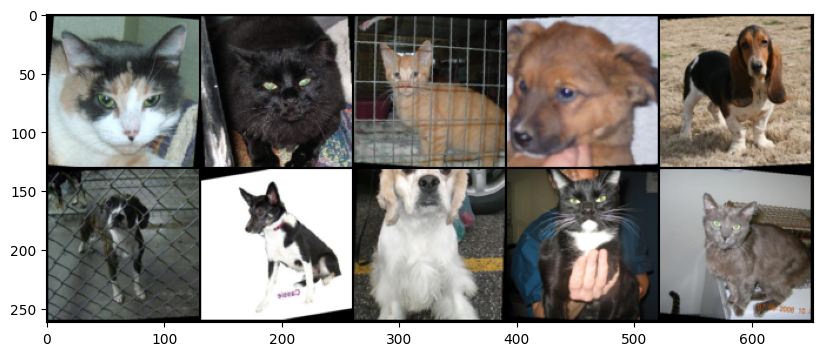

In [9]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [10]:
images.shape # batch,channel,height,width

torch.Size([10, 3, 128, 128])

## Model Definition and Instantiation

CONV/RELU/CONV/RELU/POOL/FC/RELU/DROPOUT/FC

The CNN model is introduced here. The output filter value in the Convolutional layer becomes the input value of the next layer. If the kernel size is 3 in the Convolutional layer, we need to reduce the image size of 2 pixels, one pixel each from the width and height of the image. The stride, which is the last value in the Convolutional layer, shows that the filter operates by shifting one pixel each.

The max pooling layer allows us to halve the data size in the example here, which reduces the number of parameters to learn and lowers the computational cost.

When both the convolutional layer and the max pooling layer reduced the data size, our data size decreased from 128 to 62 and data entry into the fully connected layer is done by converting data from two dimensions to one dimension.

The fully-connected layer, which provides 128 neuron output, passes to the dropout layer and prevents overfit problems.

In [11]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,3,1) # Channel, Filter, Kernel Size, Stride
        self.conv2 = nn.Conv2d(16,32,3,1)
        self.fc1 = nn.Linear(62*62*32,128)
        self.fc2 = nn.Linear(128,2)
        self.dropout = nn.Dropout(0.25)
       
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,62*62*32)
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = self.fc2(X)
        return X

In [12]:
model = CNNModel()

## Setting up Loss Function and Optmizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

## Train the model
We'll feed the data directly into the model. The reason why I classify using 2 epochs is due to the slowness of my computer. You can set the number of epochs to be optimal.

In [14]:
import time
import math
start = time.time()
epochs = 2 # Please use your optimal epoch.
train_losses = []
train_correct = []
val_losses = []
val_correct = []

for i in range(epochs):
    trn_corr = 0
    val_corr = 0
    
    # Run the training batches
    for b,(X_train,Y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        Y_pred = model(X_train)
        loss = criterion(Y_pred,Y_train)
        
        # Tally the number of correct predictions
        predictions = torch.max(Y_pred.data,1)[1]
        trn_corr+= (predictions == Y_train).sum()
        
        # Update parameters
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%160==0:
            print(f'Epoch {i+1} batch:{b} [{b*10}/{16000}] loss:{loss.item():.2f} accuracy:{(trn_corr.item()*100)/(10*b):.2f}')        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Run the validation batches
    with torch.no_grad():
        for b, (X_val,Y_val) in enumerate(val_loader):
            Y_val1 = model(X_val)
            predictions = torch.max(Y_val1.data,1)[1]
            val_corr+= (predictions == Y_val).sum()
        loss = criterion(Y_val1,Y_val)
        val_losses.append(loss)
        val_correct.append(val_corr)
end = time.time()
print(f'Train Duration : {(end-start)//60} minutes {math.ceil((end-start)%60)} seconds')

Epoch 1 batch:160 [1600/16000] loss:0.67 accuracy:55.88
Epoch 1 batch:320 [3200/16000] loss:0.71 accuracy:55.25
Epoch 1 batch:480 [4800/16000] loss:0.74 accuracy:56.19
Epoch 1 batch:640 [6400/16000] loss:0.75 accuracy:56.72
Epoch 1 batch:800 [8000/16000] loss:0.64 accuracy:57.31
Epoch 1 batch:960 [9600/16000] loss:0.51 accuracy:58.33
Epoch 1 batch:1120 [11200/16000] loss:0.52 accuracy:58.86
Epoch 1 batch:1280 [12800/16000] loss:0.43 accuracy:59.50
Epoch 1 batch:1440 [14400/16000] loss:0.57 accuracy:60.12
Epoch 1 batch:1600 [16000/16000] loss:0.57 accuracy:60.67
Epoch 2 batch:160 [1600/16000] loss:0.38 accuracy:64.25
Epoch 2 batch:320 [3200/16000] loss:0.57 accuracy:64.75
Epoch 2 batch:480 [4800/16000] loss:0.66 accuracy:65.15
Epoch 2 batch:640 [6400/16000] loss:0.94 accuracy:66.39
Epoch 2 batch:800 [8000/16000] loss:0.57 accuracy:67.39
Epoch 2 batch:960 [9600/16000] loss:0.40 accuracy:67.97
Epoch 2 batch:1120 [11200/16000] loss:0.79 accuracy:68.30
Epoch 2 batch:1280 [12800/16000] loss:

## Plot the loss and accuracy comparisons

Loss of train and validation values are:

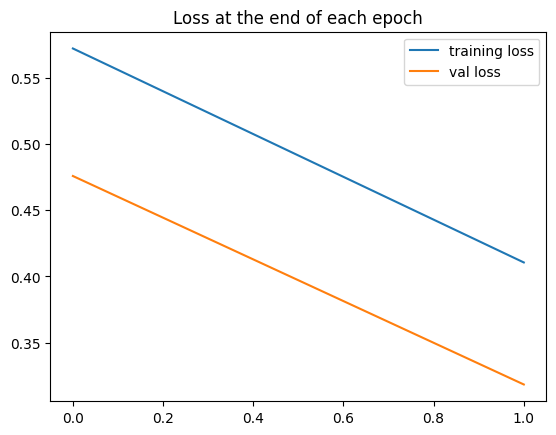

In [15]:
with torch.no_grad():
    plt.plot(train_losses, label='training loss')
    plt.plot(val_losses, label='val loss')
    plt.title('Loss at the end of each epoch')
    plt.legend();

Accuracy of train and validation values are:

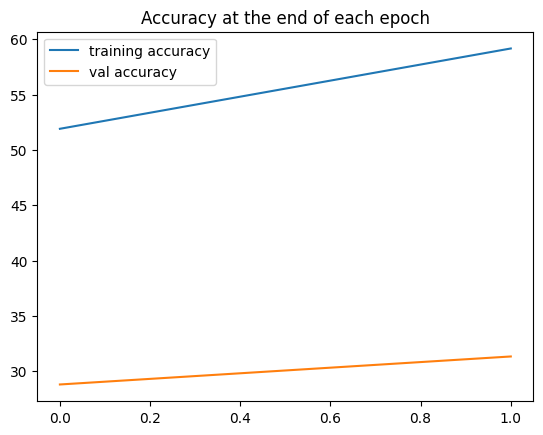

In [16]:
with torch.no_grad():
    plt.plot([t/187 for t in train_correct], label='training accuracy')
    plt.plot([t/62 for t in val_correct], label='val accuracy')
    plt.title('Accuracy at the end of each epoch')
    plt.legend();

In [17]:
#print(val_correct) # contains the results of all 10 epochs
#print()
#print(f'Val accuracy: {val_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

## Saving Model

In [18]:
torch.save(model.state_dict(),"./model1.pt")

## Evaluate Test Data

Create a loader for the entire the test set

In [19]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [20]:
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 4499/6251 =  71.972%


In [21]:
test_load_all = DataLoader(test_data, batch_size=6251, shuffle=False)

for images,labels in test_load_all: 
    print(labels)

tensor([0, 0, 0,  ..., 1, 1, 1])


In [22]:
len(test_data)

6251

### Confusion Matrix

Getting predictions from test set...


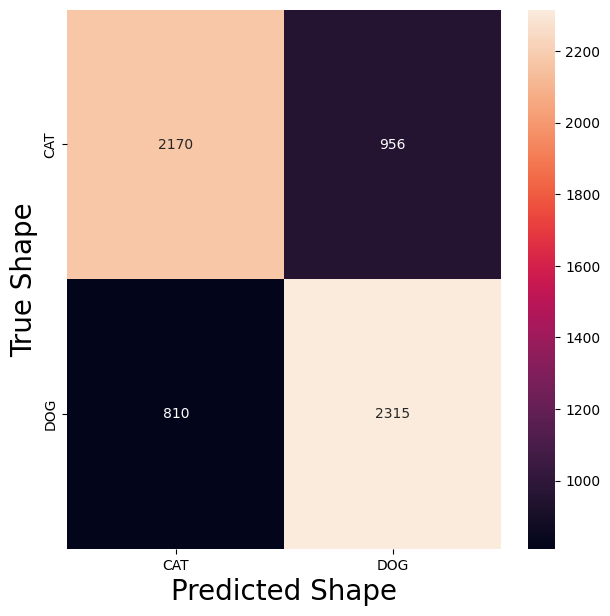

In [23]:
# Defining Labels and Predictions
truelabels = []
predictions = []
model.eval()
print("Getting predictions from test set...")
for data, target in test_loader:
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.numpy().argmax(1):
        predictions.append(prediction) 

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(class_names))

df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
plt.figure(figsize = (7,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.savefig('image.jpg')
plt.show()


It is shown on the web page.

In [24]:
from skimage import io
import plotly.express as px

img = io.imread('image.jpg')
fig = px.imshow(img)
fig.update_layout()
fig.write_html('skills.html')

#### GÖKÇE YAĞMUR BUDAK